**Chapter 9: Decision Trees: Two Possible Outcomes**

Suppose we want to create a categorical Decision Tree model that predicts whether someone smokes or not based on other factors. Just switch around some of the code, similar to the book!

In [34]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function

df = pd.read_csv('https://www.ishelp.info/data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [35]:
df = pd.get_dummies(df, columns=['sex', 'region'], drop_first=True)
df

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,yes,16884.92400,False,False,False,True
1,18,33.770,1,no,1725.55230,True,False,True,False
2,28,33.000,3,no,4449.46200,True,False,True,False
3,33,22.705,0,no,21984.47061,True,True,False,False
4,32,28.880,0,no,3866.85520,True,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,True,True,False,False
1334,18,31.920,0,no,2205.98080,False,False,False,False
1335,18,36.850,0,no,1629.83350,False,False,True,False
1336,21,25.800,0,no,2007.94500,False,False,False,True


In [36]:
y = df['smoker'] # Label
X = df.drop(columns=['smoker']) # Features
X.head()

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,False,False,True
1,18,33.770,1,1725.55230,True,False,True,False
2,28,33.000,3,4449.46200,True,False,True,False
3,33,22.705,0,21984.47061,True,True,False,False
4,32,28.880,0,3866.85520,True,True,False,False


**Training Data vs. Testing Data**

Training data is used to *train* the model, or build the model. This is when a portion of the data (usually 70%) is used to create a model.

Testing data is then the remaining portion of the data (usually 30%) to test the model. In other words, how many times did the model predict correctly? (Think: residuals)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)   # 30% test size

In [38]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
  
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train) # Notice that we train the model on the 70% training data only
  
# Predict the labels for test dataset
y_pred = clf.predict(X_test) # Notice that we test the model on the 30% test data only

In [39]:
# View the predicted versus actual in a DataFrame

output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output_df

,Actual,Predicted
559,no,no
1087,no,no
1020,no,no
460,no,no
802,no,no
...,...,...
323,no,no
1268,no,no
134,no,no
1274,yes,yes


**Confusion Matrix**

Similar to a heatmap, the confusion matrix shows the number of times the model predicts "yes" or "no" correctly and incorrectly. Does the following seem like we have an accurate model?

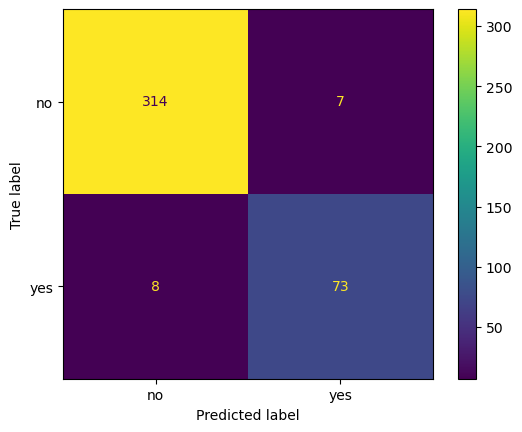

In [40]:
from sklearn import metrics
from matplotlib import pyplot as plt

cm = metrics.confusion_matrix(y_test, y_pred) # y_pred was calculated in a prior code cell
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['no', 'yes'])
cm_display.plot(values_format='d')
plt.show()

**Accuracy Metrics**

The following are various forms of measurement of the accuracy of this model. These numbers look great, but if these numbers were low, then perhaps the other variables do not accurately predict the response variable. (You'll see this if you change the label to "sex").

In [41]:
clf.score(X_test, y_test)

0.9626865671641791

In [42]:
from sklearn import metrics

# Several of these metrics have to work off of dummy codes rather than categorical values. Therefore:
y_test_dummies = pd.get_dummies(y_test, drop_first=True)
y_pred_dummies = pd.get_dummies(y_pred, drop_first=True)

# Accuracy  = (true positives + true negatives) / (total cases); ranges from 0 (worst) to 1 (best)
print(f"Accuracy:\t{metrics.accuracy_score(y_test, y_pred)}")

# Precision = (true positives / (true positives + false positives))
print(f"Precision:\t{metrics.precision_score(y_test_dummies, y_pred_dummies, labels=['no', 'yes'])}")

# Recall    = (true positives / (true positives + false negatives)) 
print(f"Recall:\t\t{metrics.recall_score(y_test_dummies, y_pred_dummies, labels=['no', 'yes'])}")

# F1        = (2 * (precision * recall) / (precision + recall))
print(f"F1:\t\t{metrics.f1_score(y_test_dummies, y_pred_dummies, labels=['no', 'yes'])}")

Accuracy:	0.9626865671641791
Precision:	0.9125
Recall:		0.9012345679012346
F1:		0.906832298136646


**Area Under the Curve (AUC)**

This is a common metric for evaluating classification models. This is a **precision-recall curve**, which shows the trade-off between precision and recall. It isn't the only one (**ROC** is another famous one, which focuses on the trade-off between true and false positives), but basically, the more area **under** the curve/lines indicates a more accurate model. 

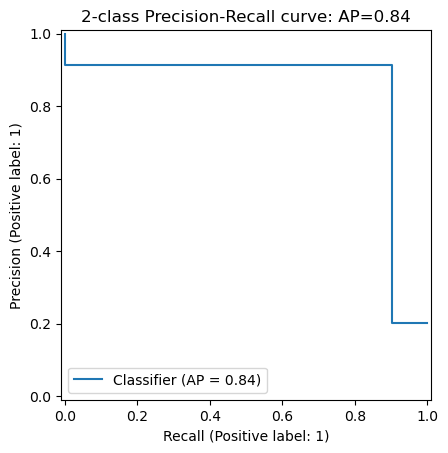

In [43]:
average_precision = metrics.average_precision_score(y_test_dummies, y_pred_dummies)
disp = metrics.PrecisionRecallDisplay.from_predictions(y_test_dummies.yes, y_pred_dummies.yes)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision))
plt.show()

**Weighted vs. Macro Avg**

Weights are commonly used to help when data is imbalanced (meaning that one category or class is much more highly represented than the other). In this case, we have a ton more non-smokers than non-smokers. 

In [44]:
df_report = pd.DataFrame(metrics.classification_report(y_test_dummies.yes, y_pred_dummies.yes, output_dict=True))
df_report

,False,True,accuracy,macro avg,weighted avg
precision,0.975155,0.912500,0.962687,0.943828,0.962531
recall,0.978193,0.901235,0.962687,0.939714,0.962687
f1-score,0.976672,0.906832,0.962687,0.941752,0.962600
support,321.000000,81.000000,0.962687,402.000000,402.000000


**IF YOU RUN INTO GRAPHVIZ ISSUES, HERE IS WHAT WORKED FOR ME**

In [45]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [46]:
dot_data = StringIO()
export_graphviz(clf, # This is the model we trained previously
                out_file = dot_data,  
                filled = True, 
                rounded = True,
                feature_names = X.columns,
                class_names = ['no','yes'])

In [47]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

In [48]:
graph.write_png('smoker.png',f='png',prog="dot")

InvocationException: GraphViz's executables not found

**Visual Plot**



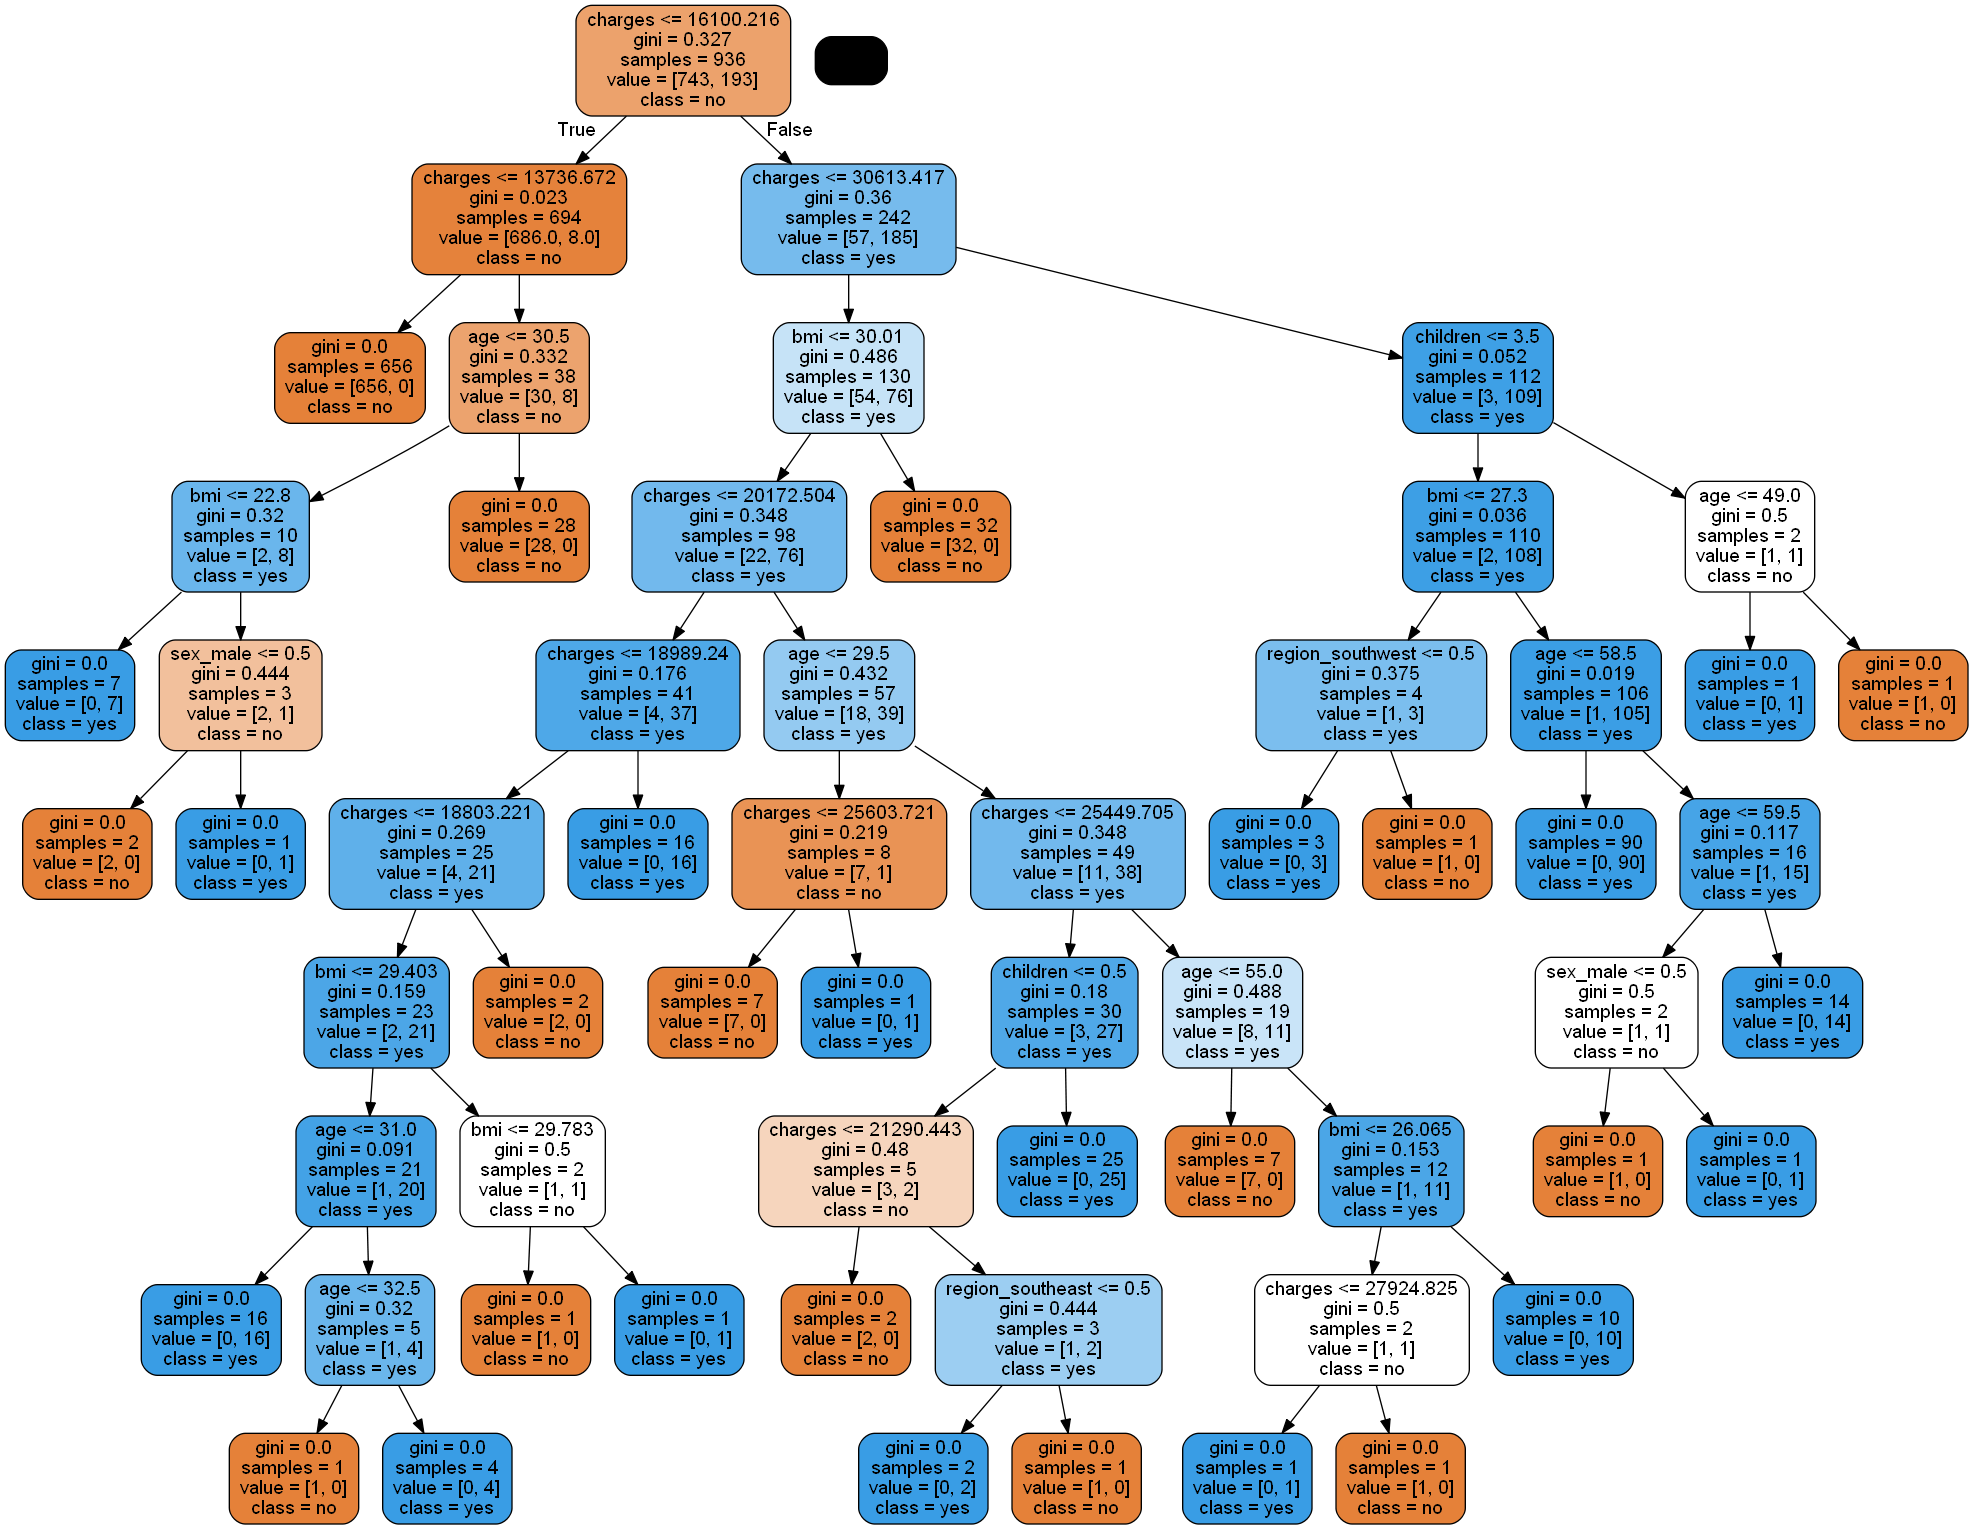

In [ ]:
Image(graph.create_png())     # This is like plt.show()